FileNotFoundError: [Errno 2] No such file or directory: '../figures/fig1.pdf'

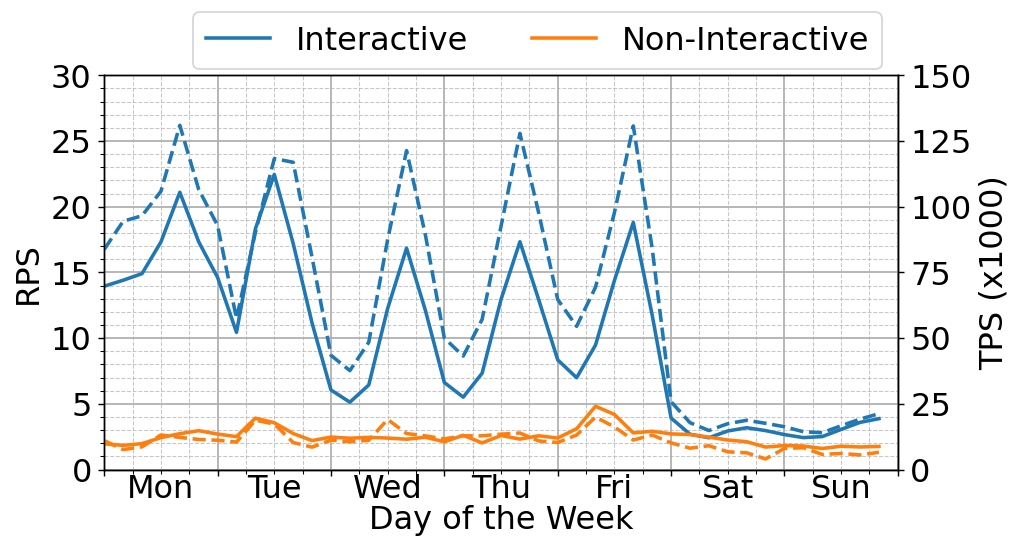

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator


path = r'../traces/final_data.csv'

df = pd.read_csv(path)
f=18

fig = plt.figure(figsize=(8, 4), dpi=128)
ax = plt.gca()

title = {'prod': 'Interactive Workloads',
         'dev': 'Non-Interactive Workloads'}
lines = []

for i, workload_type in enumerate(['prod', 'dev']):
    df_filtered = df[(df['workload_type'] == workload_type)].copy()
    df_filtered['second'] = df_filtered['arrival_timestamp'].astype(int)
    df_grouped = df_filtered.groupby('second')['request_id'].count().reset_index()
    df_grouped['rps'] = df_grouped['request_id'].rename('rps')
    df_grouped['4h_bins'] = df_grouped['second'] // (3600 * 4)
    df_grouped = df_grouped.groupby('4h_bins')['rps'].mean().reset_index()
    line, = ax.plot(df_grouped['4h_bins'], df_grouped['rps'], label=workload_type, color=f"C{i}", linewidth=2)
    lines.append(line)
ax.set_ylabel("RPS", fontsize=f)
ax.set_xlim(0, 42)

# ax.set_title(title[workload_type])

# Set major and minor ticks
ax.xaxis.set_major_locator(MultipleLocator(6))  # Major ticks every 2 units
ax.xaxis.set_minor_locator(MultipleLocator(1.5))  # Minor ticks every 0.5 units
ax.yaxis.set_major_locator(MultipleLocator(5))  # Major ticks every 1 unit
ax.yaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks every 0.2 units

# Enable the grid
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)




ax.grid(True, which='major', linewidth=1.0)  # Major grid
ax.grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7)  


# ax.set_xticks([6*i for i in range(0, 7, 1)])
# ax.set_xticklabels([str(i) for i in range(1, 8, 1)], fontsize=f)

for pos, label in zip([6*i+3 for i in range(0, 7, 1)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']):
    ax.text(pos, -0.35, label, ha='center', va='top', transform=ax.transData, fontsize=f)

ax.set_ylim(0, 30)
ax.set_yticks(list(range(0, 31, 5)))
ax.set_yticklabels(list(range(0, 31, 5)), fontsize=f)

ax.set_xlabel("Day of the Week", fontsize=f, labelpad=16)

# right y begin
ax2 = ax.twinx()
for i, workload_type in enumerate(['prod', 'dev']):
    df_filtered = df[(df['workload_type'] == workload_type)].copy()
    df_filtered['tokens'] = df_filtered['prompt_size'] + df_filtered['token_size']
    df_filtered['second'] = df_filtered['arrival_timestamp'].astype(int)
    df_grouped = df_filtered.groupby('second')['tokens'].sum().reset_index()
    df_grouped['tps'] = df_grouped['tokens'].rename('tps')
    df_grouped['4h_bins'] = df_grouped['second'] // (3600 * 4)
    df_grouped = df_grouped.groupby('4h_bins')['tps'].mean().reset_index()
    line, = ax2.plot(df_grouped['4h_bins'], df_grouped['tps']/1000, label=workload_type, color=f"C{i}", linewidth=2, linestyle='--')
    # lines.append(line)
ax2.set_ylabel("TPS (x1000)", fontsize=f)
# ax.set_xlim(0, 41)
# ax.set_xticks([6*i + 2.5 for i in range(0, 7, 1)])
# ax.set_xticklabels([str(i) for i in range(1, 8, 1)], fontsize=f)
# ax.set_title(title[workload_type])

# ax.grid(True)
        
ax2.set_ylim(0, 150)
ax2.set_yticks(list(range(0, 151, 25)))
ax2.set_yticklabels(list(range(0, 151, 25)), fontsize=f)
#right y end



ax.legend(lines, ['Interactive', 'Non-Interactive'], loc='upper right',bbox_to_anchor=(1, 1.2), ncol=2, fontsize=f)
# plt.legend(fontsize=f, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
# plt.grid(which='both', axis='both')
plt.savefig('../figures/fig1.pdf', dpi=256, bbox_inches='tight')
plt.show()


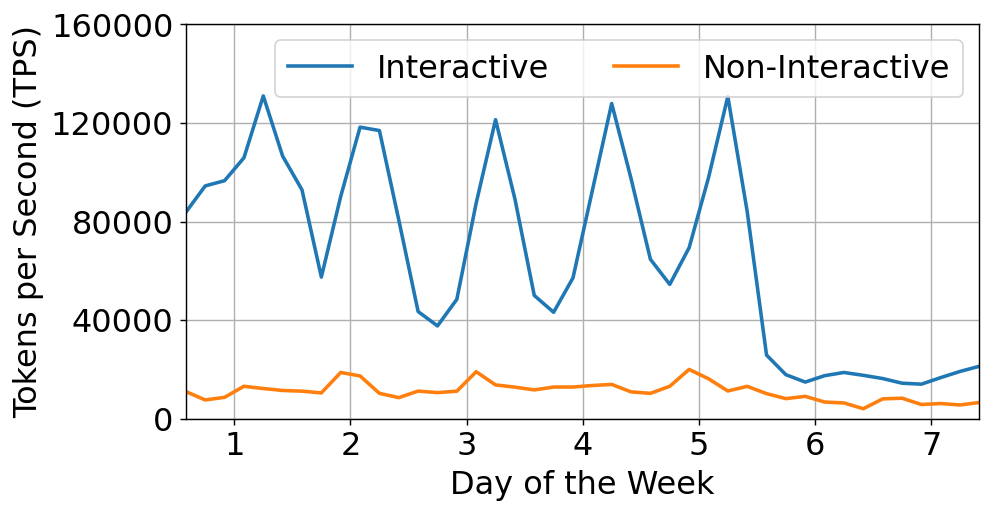

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# path = r'../traces/week.csv'

# df = pd.read_csv(path)

fig = plt.figure(figsize=(8, 4), dpi=128)
ax = plt.gca()

title = {'prod': 'Interactive Workloads',
         'dev': 'Non-Interactive Workloads'}
lines = []

for i, workload_type in enumerate(['prod', 'dev']):
    df_filtered = df[(df['workload_type'] == workload_type)].copy()
    df_filtered['tokens'] = df_filtered['prompt_size'] + df_filtered['token_size']
    df_filtered['second'] = df_filtered['arrival_timestamp'].astype(int)
    df_grouped = df_filtered.groupby('second')['tokens'].sum().reset_index()
    df_grouped['tps'] = df_grouped['tokens'].rename('tps')
    df_grouped['4h_bins'] = df_grouped['second'] // (3600 * 4)
    df_grouped = df_grouped.groupby('4h_bins')['tps'].mean().reset_index()
    line, = ax.plot(df_grouped['4h_bins'], df_grouped['tps'], label=workload_type, color=f"C{i}", linewidth=2)
    lines.append(line)
ax.set_ylabel("Tokens per Second (TPS)", fontsize=f)
ax.set_xlim(0, 41)
ax.set_xticks([6*i + 2.5 for i in range(0, 7, 1)])
ax.set_xticklabels([str(i) for i in range(1, 8, 1)], fontsize=f)
# ax.set_title(title[workload_type])

ax.grid(True)
        
ax.set_ylim(0, 160000)
ax.set_yticks(list(range(0, 160001, 40000)))
ax.set_yticklabels(list(range(0, 160001, 40000)), fontsize=f)

ax.set_xlabel("Day of the Week", fontsize=f)
ax.legend(lines, ['Interactive', 'Non-Interactive'], loc='upper right', ncol=2, fontsize=f)
plt.savefig('../figures/fig2.png', dpi=256, bbox_inches='tight')
plt.show()

In [12]:
import os

def get_merged_df(dir_path, sort_by='timestamp'):
    filenames = os.listdir(dir_path)
    frames = []
    while len(filenames) > 0:
        iter_csv = pd.read_csv(os.path.join(dir_path, filenames.pop()), iterator=True, chunksize=1000)
        df = pd.concat([chunk[(chunk['time'] >= 24*60*60) & (chunk['time'] <= 2*24*60*60)] for chunk in iter_csv])
        frames.append(df)
    # frames = [pd.read_csv(os.path.join(dir_path, filenames.pop()))]
    for filename in filenames:
        filepath = os.path.join(dir_path, filename)
        frames.append(pd.read_csv(filepath))
    if sort_by != None:
        df = pd.concat(frames).sort_values(by=sort_by).reset_index()
        return df
    else:
        df = pd.concat(frames)
        return df

In [ ]:
import os

arbiter="basic_arbiter"
seed = 0
trace_filename = 'final_data_day_1'
feed_async = True
feed_async_granularity = 1
scaling_level = 2 # 0 for off, 1 for spot, 2 for inter model scaling
scaling_interval = -1 # -1 for off, otherwise +ve values in seconds
lts = False
sts = True

def get_output_dir(arbiter=arbiter, seed=seed, trace_filename=trace_filename, feed_async=feed_async,
                   feed_async_granularity=feed_async_granularity, scaling_level=scaling_level,
                   scaling_interval=scaling_interval, lts=lts, sts=sts):
    output_dir = f'../results/{seed}/{trace_filename}/feed_async_{feed_async}/feed_async_granularity_{feed_async_granularity}/scaling_level_{scaling_level}/scaling_interval_{scaling_interval}/lts_{lts}_sts{sts}/arbiter_{arbiter}'
    assert os.path.isdir(output_dir), f"Directory {output_dir} does not exist"
    return output_dir

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = get_merged_df("../results/sts_unified/memory/", sort_by='time')
df['region_model'] = df['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df['region'] = df.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df['model'] = df.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df_silo = get_merged_df("../results/sts_siloed/memory/", sort_by='time')
df_silo['region_model'] = df_silo['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df_silo['region'] = df_silo.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df_silo['model'] = df_silo.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

models = ['B', 'A', 'C', 'D']

2 20
6 21
96.0 192.0
96.0 192.0
2 20
6 20
96.0 192.0
96.0 192.0
2 20
6 20
96.0 192.0
96.0 192.0


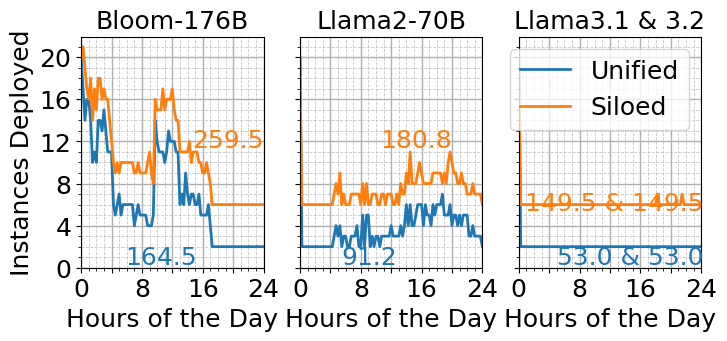

In [7]:
%matplotlib inline
f=18
import matplotlib as mpl
# mpl.use("inline")
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)
region = 'centralus'
lines = {m:[] for m in models}
names = {
    'A': 'Llama2-70B',
    'B': 'Bloom-176B',
    'C': 'Llama3.1 & 3.2',
    'D': 'Llama3.2-3B'
}
# names = {
#     'A': 'L2',
#     'B': 'B',
#     'C': 'L3.1 & 3.2',
#     'D': 'Llama3.2-3B'
# }
for i, model in enumerate(models[:3]):
    def process(df1):
        filtered = df1[(df1['model'].str.startswith(model)) & (df1['region'] == region)].copy()
        df_grouped = filtered.groupby('time').agg({'instance': lambda x: len(set(x))}).reset_index()
        df_grouped['time'] = df_grouped['time'] // (15*60)
        df_grouped = df_grouped.groupby('time').agg({'instance': lambda x: max(x)}).reset_index()
        return df_grouped, round(df_grouped['instance'].sum() / 4, 1)
    heur, ha = process(df)
    silo, sa = process(df_silo)
    print(heur['instance'].min(), heur['instance'].max())
    print(silo['instance'].min(), silo['instance'].max())
    print(heur['time'].min(), heur['time'].max())
    print(silo['time'].min(), silo['time'].max())

    # break
    if i==0:
        axes[i].text(96+6+55, -0.2, ha, ha='right', va='bottom', fontsize=f, color="C0")
        axes[i].text(96+6+90, 11, sa, ha='right', va='bottom', fontsize=f, color="C1")
    elif i==1:
        axes[i].text(96+26+25, -0.2, ha, ha='right', va='bottom', fontsize=f, color="C0")
        axes[i].text(96+28+52, 11, sa, ha='right', va='bottom', fontsize=f, color="C1")
    else:
        axes[i].text(96+44+53, -0.2, f"{str(ha)} & {str(ha)}", ha='right', va='bottom', fontsize=f, color="C0")
        axes[i].text(96+44+53, 5, f"{str(sa)} & {str(sa)}", ha='right', va='bottom', fontsize=f, color="C1")

    l = axes[i].plot(heur['time'], heur['instance'], label="Unified", color=f"C0", linewidth=2)
    
    l = axes[i].plot(silo['time'], silo['instance'], label="Siloed", color=f"C1", linewidth=2)
    
    # axes[i].set_ylim(0, 20)
    axes[i].set_xlim(96, 192)
    # axes[i].set_xlim(min(silo['time'].min(), heur['time'].min()), max(silo['time'].max(), heur['time'].max()))
    
    axes[i].set_title(f"{names[model]}", loc='center', fontsize=f)
    axes[i].set_yticks([0, 4, 8, 12, 16, 20])
    axes[i].set_yticklabels([0, 4, 8, 12, 16, 20], fontsize=f)
    axes[i].set_xlabel('Hours of the Day', fontsize=f)
    axes[i].set_xticks([96, 128, 160, 192])
    axes[i].set_xticklabels([0, 8, 16, 24], fontsize=f)
    
    # Set major and minor ticks
    axes[i].xaxis.set_major_locator(MultipleLocator(16))  # Major ticks every 2 units
    axes[i].xaxis.set_minor_locator(MultipleLocator(4))  # Minor ticks every 0.5 units
    axes[i].yaxis.set_major_locator(MultipleLocator(4))  # Major ticks every 1 unit
    axes[i].yaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks every 0.2 units

    axes[i].grid(True, which='major', linewidth=1.0)  # Major grid
    axes[i].grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7)  



axes[0].set_ylabel('Instances Deployed', fontsize=f)
axes[2].legend(loc='upper right', fontsize=f)
# plt.tight_layout()

plt.savefig('../figures/fig4-1-new.pdf', dpi=256, bbox_inches='tight', pad_inches=0.1)
plt.show()

Dev requests: 215832
[4067871, 4067907] [215832, 0] [27628.5, 20832.0] [4311331.5, 4088739.0]


/tmp/ipykernel_7225/2801053514.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['B', 'L', 'L3.1', 'L3.2'], fontsize=f)


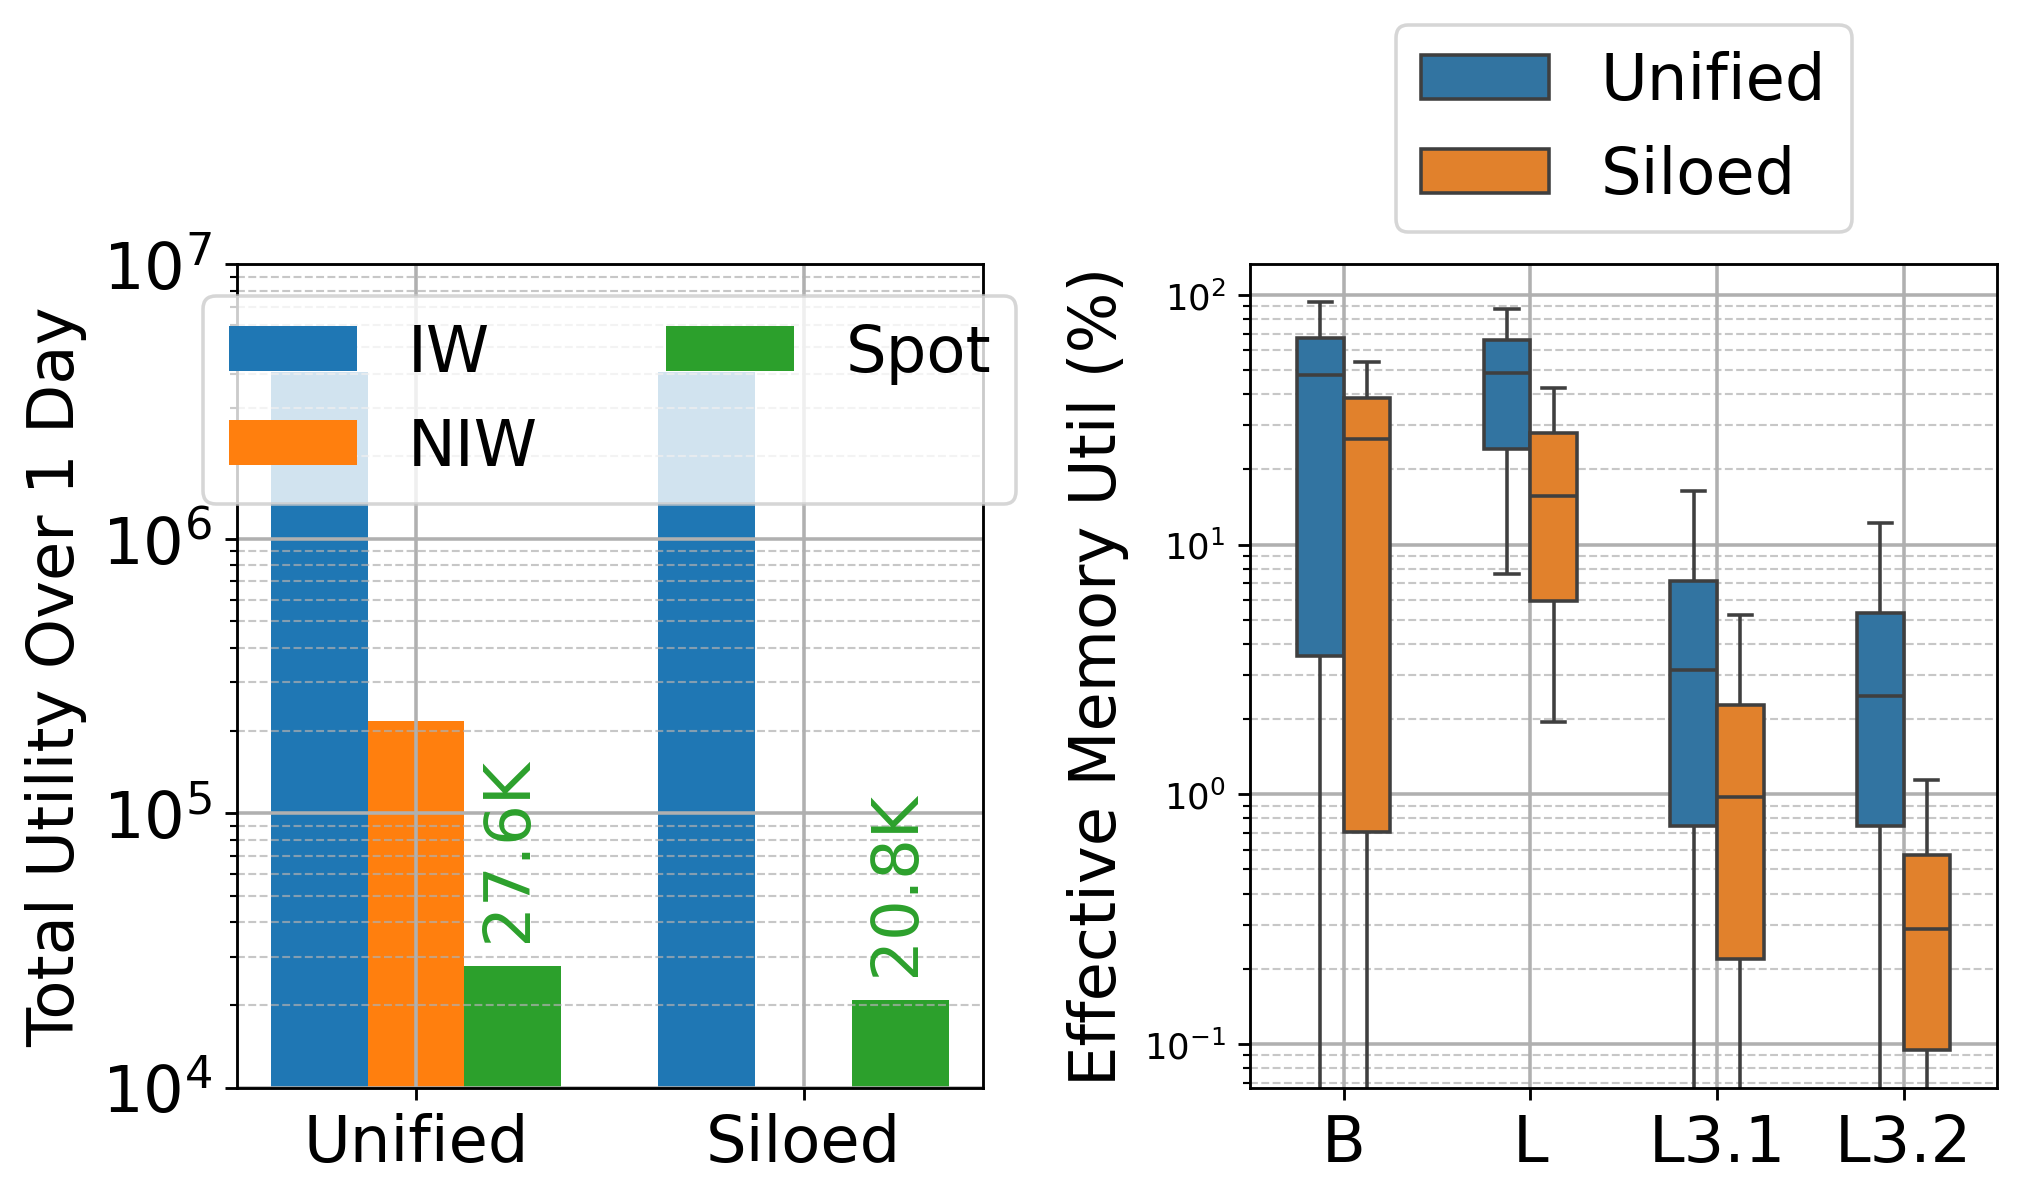

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator
import seaborn as sns


f=18
prod_weight = 3
dev_weight = 1
spot_weight_per_15m = 1.5

prod = []
dev = []
spot = []

df = get_merged_df(os.path.join("../results/sts_unified/", 'global_router'), sort_by=None)
prod.append(len(df[df['workload_type'] == 'prod']) * prod_weight)
dev.append(len(df[df['workload_type'] == 'dev']) * dev_weight)

temp_df = pd.read_csv('../traces/final_data_day_1.csv')
dev_ids = set(temp_df[temp_df['workload_type'].str.startswith('d')]['request_id'])
print(f"Dev requests: {len(dev_ids)}")

df_silo = get_merged_df(os.path.join("../results/sts_siloed/", 'global_router'), sort_by=None)
prod.append(len(df_silo[~df_silo['request_id'].isin(dev_ids)]) * prod_weight)
dev.append(len(df_silo[df_silo['request_id'].isin(dev_ids)]) * dev_weight)

df = get_merged_df(os.path.join("../results/sts_unified/", 'memory'), sort_by='time')
df_silo = get_merged_df(os.path.join("../results/sts_siloed/", 'memory'), sort_by='time')
def process(df1):
    # filtered = df1[(df1['model'].str.startswith(model)) & (df1['region'] == region)].copy()
    df_grouped = df1.groupby('time').agg({'instance': lambda x: len(set(x))}).reset_index()
    df_grouped['time'] = df_grouped['time'] // (15*60)
    df_grouped = df_grouped.groupby('time').agg({'instance': lambda x: max(x)}).reset_index()
    return df_grouped
heur = process(df)
silo = process(df_silo)
spot.append((96*20*4*3 - heur['instance'].sum()) * spot_weight_per_15m)
spot.append((96*20*4*3 - silo['instance'].sum()) * spot_weight_per_15m)
total = [prod[i]+spot[i]+dev[i] for i in range(2)]
print(prod, dev, spot, total)

# models = ['A', 'B', 'C', 'D']

# Data for the two groups of 3 bars each
group1 = [5, 7, 9]  # First group values
group2 = [4, 6, 8]  # Second group values

# Bar width
bar_width = 1/2

# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(8, 5), dpi=256)

# Plot the bars for each group
bars_group1 = ax[0].bar([1, 3], prod, bar_width, label='IW', color='C0')
# for x , y in zip([1, 3], prod):
#     ax[0].text(x , y, f"{round(y/1000000, 1)}M", ha='center', va='bottom', fontsize=f, color="C0")

bars_group2 = ax[0].bar([1.5, 3.5], dev, bar_width, label='NIW', color='C1')
# for x , y in zip([1.5, 3.5], dev):
#     ax[0].text(x-bar_width/2 , y, f"{round(y/1000000, 1)}M", ha='left', va='bottom', fontsize=f, color="C1")

bars_group3 = ax[0].bar([2, 4], spot, bar_width, label='Spot', color='C2')
for x , y in zip([2, 4], spot):
    ax[0].text(x , y, f" {round(y/1000, 1)}K", ha='center', va='bottom', fontsize=f, color="C2", rotation=90)

# bars_group3 = ax[0].bar([2.5, 5], total, bar_width, label='Total', color='C3')
# for x , y in zip([2.5, 5], total):
#     ax[0].text(x , y, f"{round(y/1000000, 1)}M", ha='center', va='bottom', fontsize=f, color="C3")

# Set the x-ticks to represent the two groups
ax[0].set_xticks([1.5, 3.5])  # Two ticks for two groups
ax[0].set_xticklabels(['Unified', 'Siloed'], fontsize=f)

# Set labels and title
# ax[0].set_xlabel('Deployment Strategy', fontsize=f)
ax[0].set_ylabel('Total Utility Over 1 Day', fontsize=f)
# ax.set_title('Grouped Bar Plot with 2 Groups of 3 Bars')

ax[0].set_yticks([1e5, 1e6, 1e7])
ax[0].set_yticklabels([1e5, 1e6, 1e7], fontsize=f)

# Add a legend
ax[0].legend(fontsize=f, ncol=4)
ax[0].set_yscale('log')
ax[0].set_ylim(1e4, 1e7)
# Set major and minor ticks
# ax.xaxis.set_major_locator(MultipleLocator(6))  # Major ticks every 2 units
# ax.xaxis.set_minor_locator(MultipleLocator(1.5))  # Minor ticks every 0.5 units
# ax.yaxis.set_major_locator(MultipleLocator(5))  # Major ticks every 1 unit
# ax.yaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks every 0.2 units

ax[0].grid(True, which='major', linewidth=1.0)  # Major grid
ax[0].grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7) 
ax[0].legend(fontsize=f, loc='upper center', ncol=2)
# ax[0].legend(fontsize=f, loc='upper center', bbox_to_anchor=(0.5, 1.33), ncol=2)


# right
f=18
models = ['B', 'A', 'C', 'D']
region = 'westus'

df = get_merged_df(os.path.join("../results/sts_unified/", 'memory'), sort_by='time')
df_silo = get_merged_df(os.path.join(get_output_dir(), 'memory'), sort_by='time')

def process(df1):
    df1['region_model'] = df1['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
    df1['region'] = df1.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
    df1['model'] = df1.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)
    df1['model_name'] = df1['model'].apply(lambda x: x[0])
    filtered = df1[((df1['model'].str.startswith(models[0])) | (df1['model'].str.startswith(models[1]))|(df1['model'].str.startswith(models[2])) | (df1['model'].str.startswith(models[3]))) & (df1['region'] == region)].copy()
    df_grouped = filtered.groupby(['time', 'model_name']).agg({'memory': 'sum', 'max_memory': 'sum'}).reset_index()
    df_grouped['util'] = df_grouped['memory'] / df_grouped['max_memory']
    df_grouped['time'] = df_grouped['time'] // (1)
    df_grouped = df_grouped.groupby(['time', 'model_name']).agg({'util': "mean"}).reset_index()
    return df_grouped

heur = process(df)
silo = process(df_silo)


dfa = {
    'util': [],
    'model':[],
    'strategy':[]
}
dfa['model'].extend(list(heur['model_name']))
dfa['util'].extend(list(heur['util']))
dfa['strategy'].extend(['Unified'] * len(heur))

dfa['model'].extend(list(silo['model_name']))
dfa['util'].extend(list(silo['util']))
dfa['strategy'].extend(['Siloed'] * len(silo))

dfa = pd.DataFrame(dfa)
dfa['util'] = dfa['util'] * 100

names = {
    'A': 'Llama2-70B',
    'B': 'Bloom-176B',
    'C': 'Llama3.1-8B',
    'D': 'Llama3.2-3B'
}
order = sorted(names.values())
dfa['model'] = dfa.apply(lambda row: names[row['model']], axis=1)

# fig = plt.figure(figsize=(8, 4))
sns.boxplot(dfa, x='model', y='util', hue='strategy', ax=ax[1], whis=[5, 95], showfliers=False, order=order, width=0.5)
# plt.ylim(1, 100)
# plt.grid(axis='y', which='both')
ax[1].grid(True, which='major', linewidth=1.0)  # Major grid
ax[1].grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7) 
# ax = plt.gca()
# ax[1].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
# ax[1].set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=f)
# ax.set_xlabel('Deployment Strategy', fontsize=f)
ax[1].set_ylabel('Effective Memory Util (%)', fontsize=f)
ax[1].set_xticklabels(['B', 'L', 'L3.1', 'L3.2'], fontsize=f)
ax[1].set_yscale('log')
# ax[1].set_ylim(0.1, 100)
ax[1].set_xlabel('')

ax[1].legend(fontsize=f, loc='upper center', bbox_to_anchor=(0.5, 1.33), ncol=1)


plt.tight_layout()
plt.savefig('../figures/fig4-2-new1.pdf', dpi=256, bbox_inches='tight')

plt.show()

In [57]:
df = get_merged_df(os.path.join(get_output_dir(trace_filename='day-1'), 'global_router'), sort_by=None)

df_silo = get_merged_df(os.path.join(get_output_dir(trace_filename='day-1-dp'), 'global_router'), sort_by=None)

In [59]:
names = {
    'A': 'Llama2-70B',
    'B': 'Bloom-176B',
    'C': 'Llama3.1-8B',
    'D': 'Llama3.2-3B'
}
mmap = {
}
for i, r in df.iterrows():
    if r['workload_type'] == 'prod':
        mmap[r['request_id']] = r['model_type']
df_silo['model_type'] = df_silo.apply(lambda x: mmap[x['request_id']] if x['request_id'] in mmap else 'X', axis=1)
print("Strategy, Model, TTFT, E2E")
for d, st in [(df_silo, 'Siloed'), (df, 'Reactive')]:
    for model in ['B', 'A', 'C', 'D']:
        dn = d[(d['model_type'].str.startswith(model)) & (d['workload_type'] == 'prod')].copy()
        print(f"{st}, {names[model]}, {round(dn['ttft'].quantile(0.95), 2)}, {round(dn['response_time'].quantile(0.95), 2)}")

Strategy, Model, TTFT, E2E
Siloed, Bloom-176B, 14.48, 55.3
Siloed, Llama2-70B, 34.9, 98.26
Siloed, Llama3.1-8B, 1.02, 10.62
Siloed, Llama3.2-3B, 1.02, 19.15
Reactive, Bloom-176B, 12.93, 53.31
Reactive, Llama2-70B, 34.48, 105.44
Reactive, Llama3.1-8B, 1.02, 10.53
Reactive, Llama3.2-3B, 1.02, 18.93


In [45]:
df_silo

,request_id,completion_time,response_time,workload_type,utility,model_type
0,10357576,28800.168347,9.423468,prod,1,D-p
1,6592345,28800.211449,22.522599,prod,1,B-p
2,6592189,28800.244611,6.359393,prod,1,B-p
3,5398771,28800.396183,3.206241,prod,1,C-d
4,6592254,28800.504696,13.026174,prod,1,B-p
...,...,...,...,...,...,...
61781,6508706,35999.808562,22.602380,prod,1,B-p
61782,6508714,35999.830135,23.742587,prod,1,B-p
61783,6508811,35999.934533,37.076171,prod,1,B-p
61784,1472156,35999.994393,10.760717,prod,1,A-p


In [ ]:
f=18
models = ['A', 'B']
regions = ['westus', 'eastus', 'centralus']

print('model,granularity,ttft_90,e2e_90,instance_hours')

for model in models:
    def get_instance_mins(path):
        df1 = get_merged_df(os.path.join(path, 'memory'), sort_by='time')
        df1['region_model'] = df1['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
        df1['region'] = df1.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
        df1['model'] = df1.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)
        res = 0
        for region in regions:
            filtered = df1[(df1['model'].str.startswith(model)) & (df1['region'] == region) & (df1['time'] >= 21600)].copy()
            df_grouped = filtered.groupby('time').agg({'instance': lambda x: len(set(x))}).reset_index()
            df_grouped['time'] = df_grouped['time'] // (60)
            df_grouped = df_grouped.groupby('time').agg({'instance': lambda x: max(x)}).reset_index()
            res += df_grouped['instance'].sum()
        return res

    for i in [15, 60, 240, 960]:
        path = get_output_dir(trace_filename='day-0', scaling_interval=i)
        df = get_merged_df(os.path.join(path, 'global_router'), sort_by=None)
        df = df[(df['model_type'] == model) & (df['workload_type'] == 'prod') & (df['completion_time'] >= 21600)]
        im = get_instance_mins(path)
        print(f"{model},{i},{round(df['ttft'].quantile(0.9), 2)},{round(df['response_time'].quantile(0.9), 2)},{round(im/60, 2)}")


model,granularity,ttft_90,e2e_90,instance_hours
A,15,10.68,51.83,112.47
A,60,11.09,53.47,110.8
A,240,10.47,51.57,111.0
A,960,10.66,51.38,111.43
B,15,19.12,66.22,694.52
B,60,19.89,68.38,707.6
B,240,19.33,69.45,723.9
B,960,17.4,66.03,752.1


KeyError: 'instance'

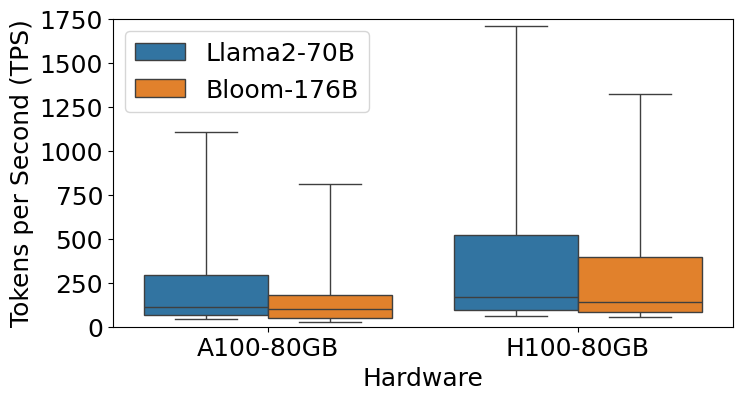

In [125]:
import pandas as pd

df = pd.read_csv('../data/perf_model.csv')
df = df[(df['hardware'].isin(['a100-80gb', 'h100-80gb'])) & (df['batch_size'] == 1) & (df['tensor_parallel'] == 8)].copy()

df['tps'] = (df['prompt_size'] + df['token_size']) / (df['e2e_time']/1000)
df['model'] = df['model'].apply(lambda x: 'Llama2-70B' if x == 'llama2-70b' else 'Bloom-176B')

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8, 4))

sns.boxplot(data=df, x='hardware', y='tps', hue='model', showfliers=False, whis=[5, 95])
plt.legend(loc='upper left')
plt.ylim(0, 1750)
plt.grid(axis='y')
plt.ylabel('Tokens per Second (TPS)', fontsize=f)
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750], [0, 250, 500, 750, 1000, 1250, 1500, 1750], fontsize=f)
plt.xticks([0, 1], ['A100-80GB', 'H100-80GB'], fontsize=f)
plt.xlabel('Hardware', fontsize=f)
plt.legend(fontsize=f)
plt.grid(which='both', axis='y')
plt.savefig('../figures/fig3.png', dpi=256, bbox_inches='tight')

plt.show()

In [5]:
def get_output_dir_lts(date='2024_12_9', time=''):
    output_dir = f'../results/{date}/{time}'
    assert os.path.isdir(output_dir), f"Directory {output_dir} does not exist"
    return output_dir

for p, threshhold in [("7_7_16", 10), ("6_26_55", 9), ("5_46_55", 8), ("5_8_59", 7), ("4_29_24", 6), ("3_52_15", 5), ("3_13_51", 4), ("2_36_43", 3), ("2_3_24", 2)]:
    df = get_merged_df(os.path.join(f"../results/2025_4_8/{p}/", 'memory'), sort_by='time')
    df['region_model'] = df['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
    df['region'] = df.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
    df['model'] = df.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

    region = 'centralus'
    model = 'A'
    def process(df1):
        filtered = df1[ (
                (df1['model'].str.startswith(model)) 
                    & (df1['time'] <= 2*86400)
                    & (df1['time'] >= 86400)
                    )
                    ].copy()
        df_grouped = filtered.groupby('time').agg({'instance': lambda x: len(set(x))}).reset_index()
        df_grouped['time'] = df_grouped['time'] // (15*60)
        df_grouped = df_grouped.groupby('time').agg({'instance': lambda x: max(x)}).reset_index()
        return df_grouped, df_grouped['instance'].sum()/4
    s, i = process(df)
    print(threshhold, i)


10 223.25
9 223.75
8 225.25
7 226.75
6 230.0
5 233.25
4 241.0
3 249.0
2 267.5


In [ ]:
model = 'A'
regions = ['westus', 'eastus', 'centralus']

threshholds=[("7_7_16", 10), ("6_26_55", 9), ("5_46_55", 8), ("5_8_59", 7), ("4_29_24", 6), ("3_52_15", 5), ("3_13_51", 4), ("2_36_43", 3), ("2_3_24", 2)]

for time, strategy in threshholds:
    path = os.path.join(f"../results/2025_4_8/{time}/", 'global_router')
    df = get_merged_df(path, sort_by=None)
    df = df[(df['workload_type'] == 'prod') & (df['model_type'] == 'A')]
    print(strategy, "ttft", (df['ttft']).quantile(0.9))
    print(strategy, "e2e", (df['response_time']).quantile(0.9))


10 ttft 20.86166006550775
10 e2e 76.03214459470473
9 ttft 20.477758341177832
9 e2e 75.80463379873254
8 ttft 19.495949851050682
8 e2e 74.15705586464901
7 ttft 18.54003743197245
7 e2e 72.56294341627654
6 ttft 17.578785851917928
6 e2e 70.56105957707041
5 ttft 16.660066151387582
5 e2e 69.26185496143444
4 ttft 14.557095546202618
4 e2e 65.60748391770903
3 ttft 13.221336871705716
3 e2e 62.76304367197736
2 ttft 10.493373011093354
2 e2e 57.95821499010344


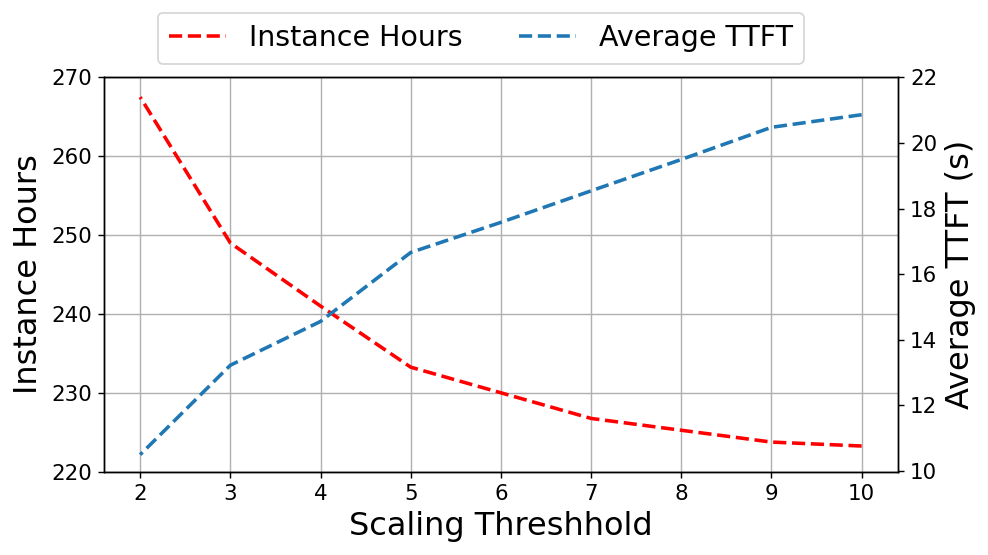

In [ ]:
instance_hours = [(10, 223.25),
(9, 223.75),
(8, 225.25),
(7, 226.75),
(6, 230.0),
(5, 233.25),
(4, 241.0),
(3, 249.0),
(2, 267.5)]

ttft = [(10, 20.86166006550775),
(9, 20.477758341177832),
(8, 19.495949851050682),
(7, 18.54003743197245),
(6, 17.578785851917928),
(5, 16.660066151387582),
(4, 14.557095546202618),
(3, 13.221336871705716),
(2, 10.493373011093354)]

f=18

fig = plt.figure(figsize=(8, 4), dpi=128)
ax = plt.gca()

lines = []

line1 = ax.plot([e[0] for e in instance_hours], [e[1] for e in instance_hours], linestyle='--', color='r', label="Instance Hours", linewidth=2)
lines.append(line1)
ax.set_ylabel("Instance Hours", fontsize=f)
ax.set_yticks([220, 230, 240, 250, 260, 270])
ax.set_yticklabels([220, 230, 240, 250, 260, 270], fontsize=12)

ax.set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([2, 3, 4, 5, 6, 7, 8, 9, 10], fontsize=12)
ax.set_xlabel("Scaling Threshhold", fontsize=f)

ax.grid()

ax2 = ax.twinx()
line2 = ax2.plot([e[0] for e in ttft], [e[1] for e in ttft], linestyle='--', label="Average TTFT", linewidth=2)
lines.append(line2)
ax2.set_ylabel("Average TTFT (s)", fontsize=f)
ax2.set_yticks([10, 12, 14, 16, 18, 20, 22])
ax2.set_yticklabels([10, 12, 14, 16, 18, 20, 22], fontsize=12)

# ax.legend(lines, ["Instance Hours", "Average TTFT"])
all_ln = line1 + line2
labs = [l.get_label() for l in all_ln]
ax.legend(all_ln, labs, bbox_to_anchor=(0.9, 1.2), ncols=2, fontsize=16)


plt.savefig('../figures/ltua_scaling_threshhoold.pdf', dpi=256, bbox_inches='tight')
plt.show()


In [13]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def get_output_dir_lts(date='2024_12_9', time=''):
    output_dir = f'../results/{date}/{time}'
    assert os.path.isdir(output_dir), f"Directory {output_dir} does not exist"
    return output_dir

df1 = get_merged_df(os.path.join("../../capalloc_results/lts_simple/", 'memory'), sort_by='time')
# iter_csv = pd.read_csv('file.csv', iterator=True, chunksize=1000)
# df1 = pd.concat([chunk[(chunk['time'] <= 2*24*60*60) & (chunk['time'] >= 24*60*60)] for chunk in iter_csv])
df1['region_model'] = df1['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df1['region'] = df1.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df1['model'] = df1.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df2 = get_merged_df(os.path.join("../../capalloc_results/lts_memory_utilization/", 'memory'), sort_by='time')
df2['region_model'] = df2['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df2['region'] = df2.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df2['model'] = df2.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df3 = get_merged_df(os.path.join("../../capalloc_results/lts_arima_checking/", 'memory'), sort_by='time')
df3['region_model'] = df3['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df3['region'] = df3.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df3['model'] = df3.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df4 = get_merged_df(os.path.join("../../capalloc_results/sts_unified/", 'memory'), sort_by='time')
df4['region_model'] = df4['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df4['region'] = df4.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df4['model'] = df4.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df5 = get_merged_df(os.path.join("../results/0/final_data_day_1/feed_async_True/feed_async_granularity_1/scaling_level_2/scaling_interval_-1/lts_False_stsTrue/arbiter_chiron_arbiter/", 'memory'), sort_by='time')
df5['region_model'] = df5['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df5['region'] = df5.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df5['model'] = df5.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)
 

In [14]:
df5.head()

,index,time,instance,memory,max_memory,model_memory,pending_requests,region_model,region,model
0,427,86400.035194,centralus_D-d_2_1,0.0,667694767360,19500000000,0,centralus_D-d,centralus,D-d
1,428,86400.035194,centralus_D-d_2_2,0.0,667694767360,19500000000,0,centralus_D-d,centralus,D-d
2,480,86400.035194,eastus_A-d_0_0,0.0,552194767360,135000000000,0,eastus_A-d,eastus,A-d
3,417,86400.035194,centralus_C_5_2,0.0,636194767360,51000000000,0,centralus_C,centralus,C
4,418,86400.035194,centralus_C_6_0,0.0,636194767360,51000000000,0,centralus_C,centralus,C


1008000
     time  instance
0    96.0         2
1    97.0         2
2    98.0         2
3    99.0         2
4   100.0         2
..    ...       ...
91  187.0         2
92  188.0         2
93  189.0         2
94  190.0         2
95  191.0         2

[96 rows x 2 columns]
1056490
     time  instance
0    96.0         2
1    97.0         2
2    98.0         2
3    99.0         2
4   100.0         2
..    ...       ...
91  187.0         3
92  188.0         3
93  189.0         3
94  190.0         2
95  191.0         2

[96 rows x 2 columns]
1172430
     time  instance
0    96.0         2
1    97.0         2
2    98.0         2
3    99.0         2
4   100.0         2
..    ...       ...
91  187.0         3
92  188.0         3
93  189.0         3
94  190.0         3
95  191.0         3

[96 rows x 2 columns]
1132990
     time  instance
0    96.0        20
1    97.0         2
2    98.0         2
3    99.0         2
4   100.0         3
..    ...       ...
91  187.0         3
92  188.0         3

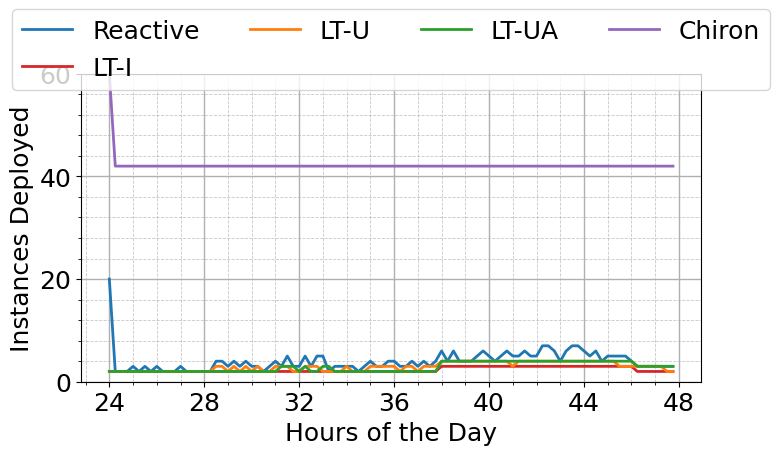

In [21]:
f=18
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
lines=[]
region = 'centralus'
model = 'A'
def process(df1):
    filtered = df1[ (
            (df1['model'].str.startswith(model)) 
                   & (df1['time'] <= 2*86400)
                   & (df1['time'] >= 86400)
                   & (df1['region'] == region)
                   )
                   ].copy()
    print(filtered.size)
    df_grouped = filtered.groupby('time').agg({'instance': lambda x: len(set(x))}).reset_index()
    df_grouped['time'] = df_grouped['time'] // (15*60)
    df_grouped = df_grouped.groupby('time').agg({'instance': lambda x: max(x)}).reset_index()
    print(df_grouped)
    return df_grouped, df_grouped['instance'].sum()/4

s1, i1 = process(df1)
s2, i2 = process(df2)
s3, i3 = process(df3)
s4, i4 = process(df4)
s5, i5 = process(df5)
print(i1, i2, i3, i4, i5)
lines.append(ax.plot(s4['time'], s4['instance'], label="Reactive", color=f"C0", linewidth=2))
lines.append(ax.plot(s1['time'], s1['instance'], label="LT-I", color=f"C3", linewidth=2))
lines.append(ax.plot(s2['time'], s2['instance'], label="LT-U", color=f"C1", linewidth=2))
lines.append(ax.plot(s3['time'], s3['instance'], label="LT-UA", color=f"C2", linewidth=2))
lines.append(ax.plot(s5['time'], s5['instance'], label="Chiron", color=f"C4", linewidth=2))

print(s4['time'].min(), s4['time'].max())
print(s1['time'].min(), s1['time'].max())
print(s2['time'].min(), s2['time'].max())
print(s3['time'].min(), s3['time'].max())
print(s5['time'].min(), s5['time'].max())

ax.set_ylim(0, 60)
# ax.set_xlim(0, 86400//900)
# ax.set_title(f"Model {model}", loc='center', pad=10, y=0.82, fontsize=f)
# ax.set_yticks([0, 4, 8, 12, 16, 20])
# ax.set_yticklabels([0, 4, 8, 12, 16, 20], fontsize=f)
# plt.yticks(fontsize = f)
ax.set_ylabel('Instances Deployed', fontsize=f)
ax.grid(True, which='major', linewidth=1.0)  # Major grid
ax.grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7) 

ax.legend(fontsize=f, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel('Hours of the Day', fontsize=f)
ax.set_xticks([96+0, 96+16, 96+32, 96+48, 96+64, 96+80, 96+96])
ax.set_xticklabels([24+0, 24+4, 24+8, 24+12, 24+16, 24+20, 24+24], fontsize=f)
ax.set_yticks([0, 20, 40, 60])
ax.set_yticklabels([0, 20, 40, 60], fontsize=f)
# plt.grid(which='both', axes='both')
# Set major and minor ticks
ax.xaxis.set_major_locator(MultipleLocator(16))  # Major ticks every 2 units
ax.xaxis.set_minor_locator(MultipleLocator(4))  # Minor ticks every 0.5 units
ax.yaxis.set_major_locator(MultipleLocator(20))  # Major ticks every 1 unit
ax.yaxis.set_minor_locator(MultipleLocator(4))  # Minor ticks every 0.2 units

ax.grid(True, which='major', linewidth=1.0)  # Major grid
ax.grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7)  
plt.savefig('../figures/eval-1.pdf', dpi=256, bbox_inches='tight')
plt.show()


[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[480.0, 480.0, 480.0]


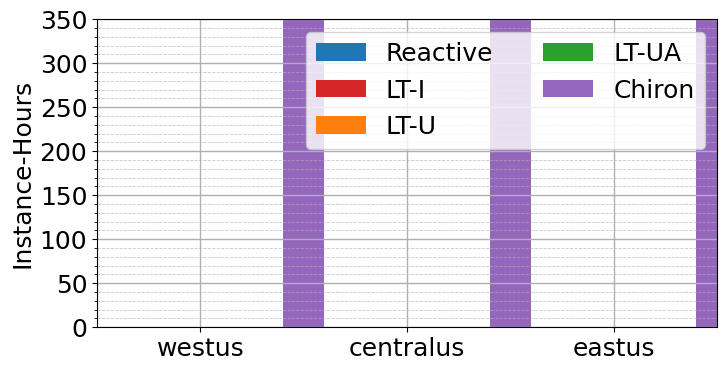

In [17]:
f=18
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
lines=[]
regions = ['westus', 'centralus', 'eastus']
model = 'A-d'
def process(df1, region):
    filtered = df1[
        (df1['model'].str.startswith(model)) 
        & (df1['region'] == region) 
        & (df1['time'] <= 2*86400)
        & (df1['time'] >= 86400)
        ].copy()
    df_grouped = filtered.groupby('time').agg({'instance': lambda x: len(set(x))}).reset_index()
    df_grouped['time'] = df_grouped['time'] // (15*60)
    df_grouped = df_grouped.groupby('time').agg({'instance': lambda x: max(x)}).reset_index()
    return df_grouped, df_grouped['instance'].sum()/4
mmap = {}
id = 0 
for df, st, c in [(df4, 'Reactive', 'C0'), (df1, 'LT-I', 'C3'), (df2, 'LT-U', 'C1'), (df3, 'LT-UA', 'C2'), (df5, 'Chiron', 'C4')]:
    for region in regions:
        s, i = process(df, region)
        if st not in mmap:
            mmap[st] = []
        mmap[st].append(i)
    ax.bar([1+id, 6+id, 11+id], mmap[st], width=1, label=st, color=c)
    id+=1
    print(mmap[st])

# print(mmap)

# lines.append(ax.plot(s4['time'], s4['instance'], label="Reactive", color=f"C0", linewidth=2))
# lines.append(ax.plot(s1['time'], s1['instance'], label="LT-I", color=f"C3", linewidth=2))
# lines.append(ax.plot(s2['time'], s2['instance'], label="LT-U", color=f"C1", linewidth=2))
# lines.append(ax.plot(s3['time'], s3['instance'], label="LT-UA", color=f"C2", linewidth=2))
# ax.set_ylim(0, 350)
ax.set_xlim(0, 15)
# ax.set_title(f"Model {model}", loc='center', pad=10, y=0.82, fontsize=f)
# ax.set_yticks([0, 4, 8, 12, 16, 20])
# ax.set_yticklabels([0, 4, 8, 12, 16, 20], fontsize=f)
# plt.yticks(fontsize = f)
ax.set_ylabel('Instance-Hours', fontsize=f)
# ax.grid(True, which='major', linewidth=1.0)  # Major grid
# ax.grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7) 

ax.legend(fontsize=f, loc='upper right', ncol=2)
# ax.set_xlabel('Hours of the Day', fontsize=f)
ax.set_yticks(list(range(0, 351, 50)))
ax.set_yticklabels(list(range(0, 351, 50)), fontsize=f)
ax.set_xticks([2.5, 7.5, 12.5])
ax.set_xticklabels(regions, fontsize=f)

# ax.xaxis.set_major_locator(MultipleLocator(50))  # Major ticks every 2 units
# ax.xaxis.set_minor_locator(MultipleLocator(4))  # Minor ticks every 0.5 units
ax.yaxis.set_major_locator(MultipleLocator(50))  # Major ticks every 1 unit
ax.yaxis.set_minor_locator(MultipleLocator(10))  # Minor ticks every 0.2 units

ax.grid(True, which='major', linewidth=1.0)  # Major grid
ax.grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7)  
plt.savefig('../figures/eval-3.pdf', dpi=256, bbox_inches='tight')
plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def get_output_dir_lts(date='2024_12_10', time=''):
    output_dir = f'../results/{date}/{time}'
    assert os.path.isdir(output_dir), f"Directory {output_dir} does not exist"
    return output_dir

df1 = get_merged_df(os.path.join("../results/full_week_results/lts_simple/", 'global_router'), sort_by=None)
# df1['region_model'] = df1['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
# df1['region'] = df1.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
# df1['model'] = df1.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df2 = get_merged_df(os.path.join("../results/full_week_results/lts_memory_utilization/", 'global_router'), sort_by=None)
# df2['region_model'] = df2['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
# df2['region'] = df2.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
# df2['model'] = df2.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df3 = get_merged_df(os.path.join("../results/full_week_results/lts_arima_checking/", 'global_router'), sort_by=None)
# df3['region_model'] = df3['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
# df3['region'] = df3.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
# df3['model'] = df3.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df4 = get_merged_df(os.path.join("../results/full_week_results/sts_unified/", 'global_router'), sort_by=None)
# df4['region_model'] = df4['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
# df4['region'] = df4.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
# df4['model'] = df4.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

In [ ]:
df1.head()

,request_id,completion_time,response_time,ttft,workload_type,utility,model_type
0,5267189,252001.963243,5.321366,1.011927,dev,1,C
1,1673046,252001.985496,16.134026,6.182306,dev,1,A
2,5267226,252001.990857,6.677965,1.013994,dev,1,C
3,4306922,252002.147012,5.172050,1.010481,prod,1,C
4,4306898,252002.270259,1.204451,1.018713,prod,1,C


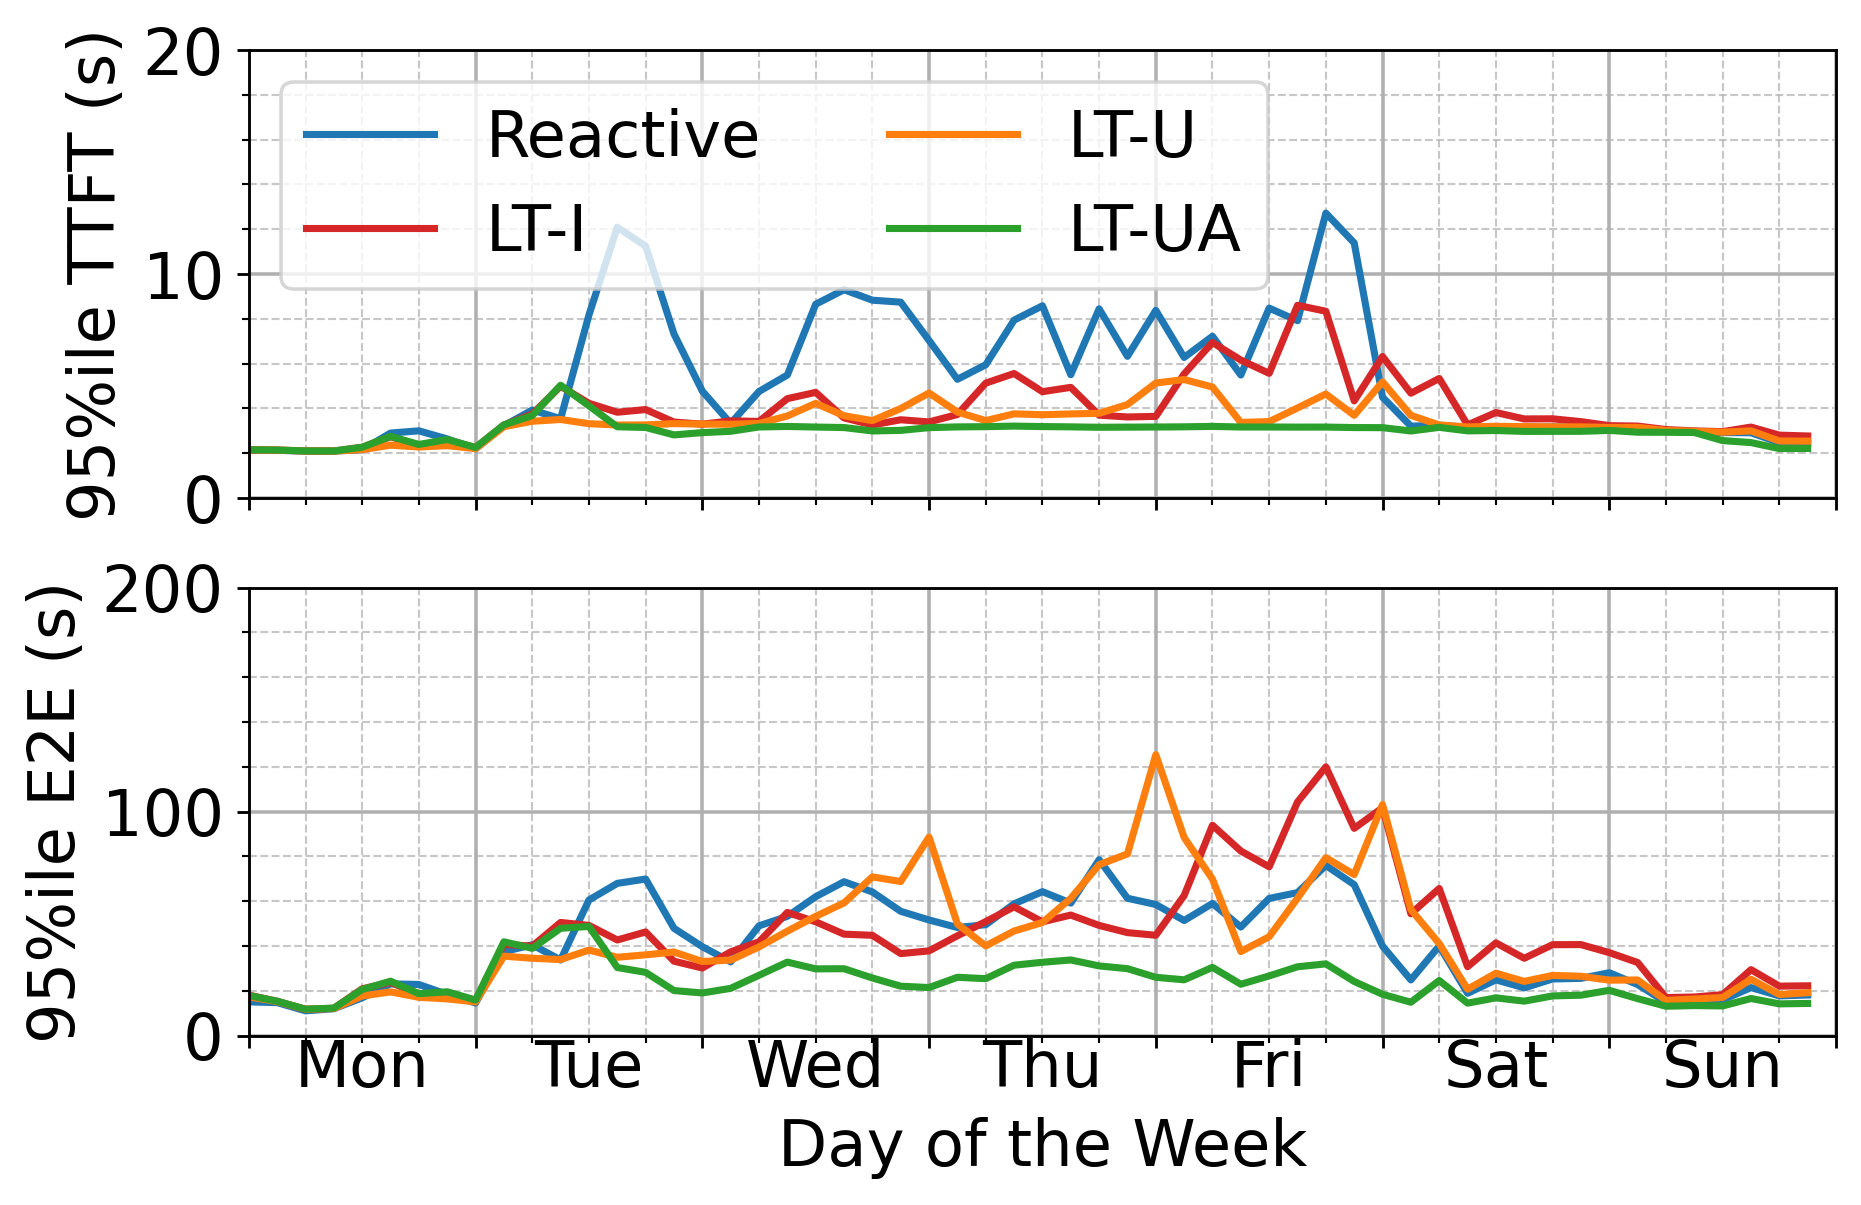

In [ ]:
from matplotlib.ticker import MultipleLocator

f=18
fig, ax = plt.subplots(2, 1, figsize=(8, 5), dpi=256, sharex=True)
models = ['B', 'A', 'B', 'C']
lines=[]
def process(df, model):
    filtered = df[(df['model_type'].str.startswith(model)) & (df['workload_type'] == 'prod') & (df['completion_time'] < (86400*7))].copy()
    filtered['completion_time'] = filtered['completion_time'] // (3600*3)
    df_grouped = filtered.groupby('completion_time').agg({'ttft': lambda x: x.quantile(0.5), 'response_time': lambda x: x.quantile(0.95)}).reset_index()
    # df_grouped['time'] = df_grouped['time'] // (15*60)
    # df_grouped = df_grouped.groupby('time').agg({'instance': lambda x: max(x)}).reset_index()
    # return df_grouped, df_grouped['instance'].sum()/4
    return df_grouped
# s1, i1 = process(df1)
names = {
    'A': 'Llama2-70B',
    'B': 'Bloom-176B',
    'C': 'Llama3.1-8B',
    'D': 'Llama3.2-3B'
}

dp = {'Reactive':{'A':None},
      'LT-I':{'A':None},
      'LT-U':{'A':None},
      'LT-UA':{'A':None}
}

for df, st, c in [(df4, 'Reactive', 'C0'), (df1, 'LT-I', 'C3'), (df2, 'LT-U', 'C1'), (df3, 'LT-UA', 'C2')]:
    for model in ['A']:
        if dp[st][model] == None:
            dp[st][model] = process(df, model)
        dfa = dp[st][model]
        ax[0].plot(dfa['completion_time'], dfa['ttft'], label=st, color=c, linewidth=2)
        ax[1].plot(dfa['completion_time'], dfa['response_time'], label=st, color=c, linewidth=2)
        
for a in ax:
    a.set_xlim(0, 168/3)


    a.grid(True, which='major', linewidth=1.0)  # Major grid
    a.grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7)  

ax[0].xaxis.set_major_locator(MultipleLocator(8))  # Major ticks every 2 units
ax[0].xaxis.set_minor_locator(MultipleLocator(2))  # Minor ticks every 0.5 units
ax[0].yaxis.set_major_locator(MultipleLocator(10))  # Major ticks every 1 unit
ax[0].yaxis.set_minor_locator(MultipleLocator(2))  # Minor ticks every 0.2 units

ax[1].xaxis.set_major_locator(MultipleLocator(8))  # Major ticks every 2 units
ax[1].xaxis.set_minor_locator(MultipleLocator(2))  # Minor ticks every 0.5 units
ax[1].yaxis.set_major_locator(MultipleLocator(100))  # Major ticks every 1 unit
ax[1].yaxis.set_minor_locator(MultipleLocator(20))  # Minor ticks every 0.2 units

ax[0].set_yticks([0, 10, 20])
ax[0].set_yticklabels([0, 10, 20], fontsize=f)
ax[1].set_yticks([0, 100, 200])
ax[1].set_yticklabels([0, 100, 200], fontsize=f)

# lines.append(ax.plot(s1['time'], s1['instance'], label="Immediate", color=f"C3", linewidth=2))
# lines.append(ax.plot(s2['time'], s2['instance'], label="Utilization", color=f"C1", linewidth=2))
# lines.append(ax.plot(s3['time'], s3['instance'], label="Utilization with ARIMA", color=f"C2", linewidth=2))
# lines.append(ax.plot(s4['time'], s4['instance'], label="Reactive Only", color=f"C0", linewidth=2))

# ax.set_ylim(0, 300)
# # ax.set_xlim(0, 86400//900)
# # # ax.set_title(f"Model {model}", loc='center', pad=10, y=0.82, fontsize=f)
# ax.set_yticks([0, 50, 100, 150, 200, 250, 300])
# ax.set_yticklabels([0, 50, 100, 150, 200, 250, 300], fontsize=f)
# # plt.yticks(fontsize = f)
# ax.set_ylabel('Instances-Hours', fontsize=f)
# ax.grid(True)

ax[0].legend(loc='upper left', fontsize=f, ncols=2)
ax[0].set_ylim(0, 20)
ax[1].set_ylim(0, 200)
ax[0].set_ylabel('95%ile TTFT (s)', fontsize=f)
ax[1].set_ylabel('95%ile E2E (s)', fontsize=f)
for pos, label in zip([8*i+4 for i in range(0, 7, 1)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']):
    ax[1].text(pos, -0.85, label, ha='center', va='top', fontsize=f)

ax[1].set_xticklabels([])

ax[1].set_xlabel("Day of the Week", fontsize=f, labelpad=16)


# ax.set_xlabel('Regions', fontsize=f)
# ax.set_xticks([2, 6, 10])
# ax.set_xticklabels(regions, fontsize=f)
plt.savefig('../figures/eval-7day.pdf', dpi=256, bbox_inches='tight')
plt.show()

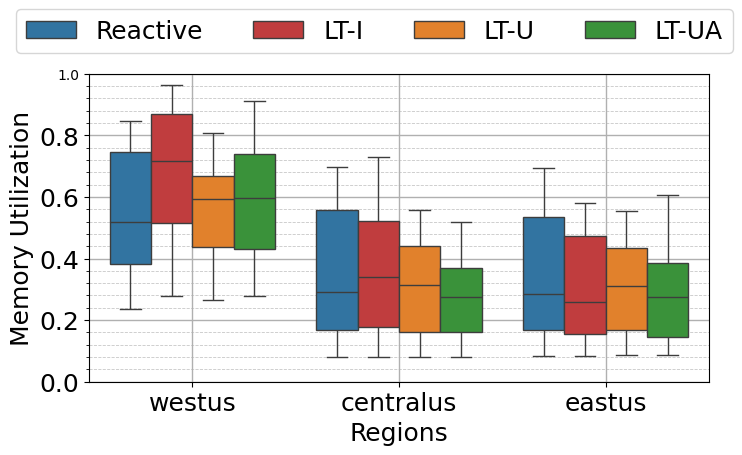

In [ ]:
f=18
model = 'A'
regions = ['westus', 'centralus', 'eastus']

monday = [('day-0', 'Reactive Only'),
    ('10_45_29', 'Immediate'),
          ('10_45_44', 'Utilization'),
          ('10_45_57', 'Utilization + ARIMA')
          ]

tuesday = [
    ('day-1', 'Reactive', df4),
    ('2_47_46', 'LT-I', df1),
    ('3_9_53', 'LT-U', df2),
    ('3_34_33', 'LT-UA', df3)
]

custom_palette = {
    'Reactive': 'C0',
    'LT-U': 'C1',
    'LT-UA': 'C2',
    'LT-I': 'C3'
}

dfa = {
    'util': [],
    'strategy':[],
    'region': [],
}

def process(df1, region):
    filtered = df1[
        (df1['model'].str.startswith(model)) 
        & (df1['region'] == region) 
        & (df1['time'] <= 2*86400)
        & (df1['time'] >= 86400)
        ].copy()

    # df_grouped = filtered.groupby('time').agg({'instance': lambda x: len(set(x)), 'memory': 'sum', 'max_memory': 'sum'}).reset_index()
    # df_grouped['util'] = df_grouped['memory'] / df_grouped['max_memory']
    # df_grouped['time'] = df_grouped['time'] // (900)
    # df_grouped = df_grouped.groupby('time').agg({'util': lambda x:x.quantile(0.9)}).reset_index()
    # return list(df_grouped['util'])

    filtered['util'] = filtered['memory'] / filtered['max_memory']
    df_grouped = filtered.groupby('time').agg({'util': 'max'}).reset_index()
    df_grouped['time'] = df_grouped['time'] // (900)
    df_grouped = df_grouped.groupby('time').agg({'util': 'mean'}).reset_index()
    return list(df_grouped['util'])

for region in regions:
    for _, strategy, df in tuesday:
        util = process(df, region)
        dfa['util'].extend(util)
        dfa['region'].extend([region]*len(util))
        dfa['strategy'].extend([strategy]*len(util))

dfa = pd.DataFrame(dfa)

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8, 4))

sns.boxplot(data=dfa, x='region', y='util', hue='strategy', showfliers=False, whis=[5, 95], palette=custom_palette)
# plt.legend(loc='upper center', ncol=2, fontsize=f)
plt.ylim(0, 1)
# plt.grid(axis='y', which='both')
plt.ylabel('Memory Utilization', fontsize=f)
plt.yticks(fontsize=f)
plt.xticks(fontsize=f)
plt.xlabel('Regions', fontsize=f)
plt.legend(fontsize=f, loc='upper center', bbox_to_anchor=(0.46, 1.25), ncol=4)
# plt.grid(axis='y', which='both')
a=plt.gca()
# a.xaxis.set_major_locator(MultipleLocator(0.2))  # Major ticks every 2 units
# a.xaxis.set_minor_locator(MultipleLocator(0.04))  # Minor ticks every 0.5 units
a.yaxis.set_major_locator(MultipleLocator(0.2))  # Major ticks every 2 units
a.yaxis.set_minor_locator(MultipleLocator(0.04))  # Minor ticks every 0.5 units
a.grid(True, which='major', linewidth=1.0)  # Major grid
a.grid(True, which='minor', linestyle='--', linewidth=0.6, alpha=0.7)  
# ax = fig.gca()
# ax.set_yscale('log')
# ax.set_yticks([1, 10, 100])
# ax.set_yticklabels([1, 10, 100], fontsize=f)
plt.savefig('../figures/eval-4.pdf', dpi=256, bbox_inches='tight')

plt.show()

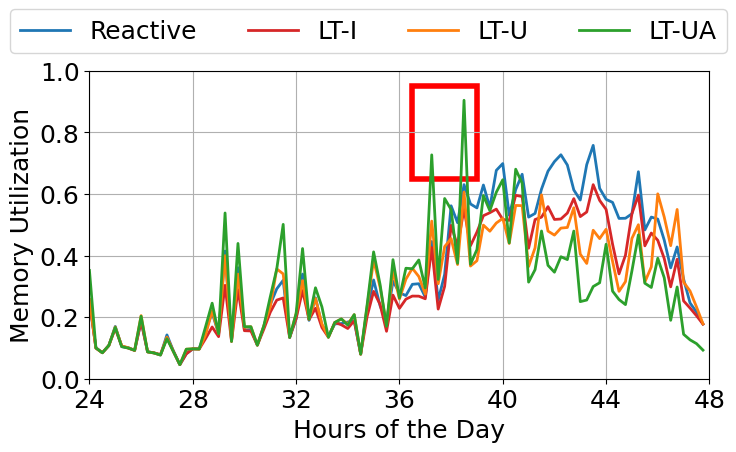

In [ ]:
f=18
model = 'A'

region = 'eastus'
monday = [('day-0', 'Reactive Only'),
            ('10_45_29', 'Immediate'),
          ('10_45_44', 'Utilization'),
          ('10_45_57', 'Utilization + ARIMA')
          ]

tuesday = [
    ('day-1', 'Reactive Only', df4),
    ('2_47_46', 'Immediate', df1),
    ('3_9_53', 'Utilization', df2),
    ('3_34_33', 'Utilization + ARIMA', df3)
]

custom_palette = {
    'Reactive Only': 'C0',
    'Utilization': 'C1',
    'Utilization + ARIMA': 'C2',
    'Immediate': 'C3'
}


def process(df1):
    filtered = df1[
        (df1['model'].str.startswith(model)) 
        & (df1['region'] == region) 
        & (df1['time'] >= 86400)
        & (df1['time'] <= 2*86400)
        ].copy()

    # df_grouped = filtered.groupby('time').agg({'memory': 'sum', 'max_memory': 'sum'}).reset_index()
    # df_grouped['util'] = df_grouped['memory'] / df_grouped['max_memory']
    # df_grouped['time'] = df_grouped['time'] // (900)
    # df_grouped = df_grouped.groupby('time').agg({'util': lambda x:x.quantile(0.5)}).reset_index()

    filtered['util'] = filtered['memory'] / filtered['max_memory']
    df_grouped = filtered.groupby('time').agg({'util': 'max'}).reset_index()
    df_grouped['time'] = df_grouped['time'] // (900)
    df_grouped = df_grouped.groupby('time').agg({'util': 'mean'}).reset_index()
    return df_grouped

fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
lines=[]

d1 = process(df1)
d2 = process(df2)
d3 = process(df3)
d4 = process(df4)

lines.append(ax.plot(d4['time'], d4['util'], label="Reactive", color=f"C0", linewidth=2))
lines.append(ax.plot(d1['time'], d1['util'], label="LT-I", color=f"C3", linewidth=2))
lines.append(ax.plot(d2['time'], d2['util'], label="LT-U", color=f"C1", linewidth=2))
lines.append(ax.plot(d3['time'], d3['util'], label="LT-UA", color=f"C2", linewidth=2))

import matplotlib.patches as patches


# Create a Rectangle patch
rect = patches.Rectangle((96+50, 0.65), 10, 0.3, linewidth=4, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)



ax.set_ylim(0, 1)
ax.set_xlim(86400//900, 2*86400//900)
# ax.set_title(f"Model {model}", loc='center', pad=10, y=0.82, fontsize=f)
# ax.set_yticks([0, 4, 8, 12, 16, 20])
# ax.set_yticklabels([0, 4, 8, 12, 16, 20], fontsize=f)
plt.yticks(fontsize = f)
ax.set_ylabel('Memory Utilization', fontsize=f)
ax.grid(True)

plt.legend(fontsize=f, loc='upper center', bbox_to_anchor=(0.45, 1.24), ncol=4)
ax.set_xlabel('Hours of the Day', fontsize=f)
ax.set_xticks([96+0, 96+16, 96+32, 96+48, 96+64, 96+80, 96+96])
ax.set_xticklabels([24+0, 24+4, 24+8, 24+12, 24+16, 24+20, 24+24], fontsize=f)
plt.savefig('../figures/eval-load-burst.pdf', dpi=256, bbox_inches='tight')

plt.show()

Reactive ttft 18.700541020877438
Reactive e2e 71.17366704232408
LT-I ttft 119.29701126178655
LT-I e2e 266.4649426987743
LT-U ttft 14.595390396122815
LT-U e2e 68.12642980975798
LT-UA ttft 16.874173964187513
LT-UA e2e 69.66502486763639


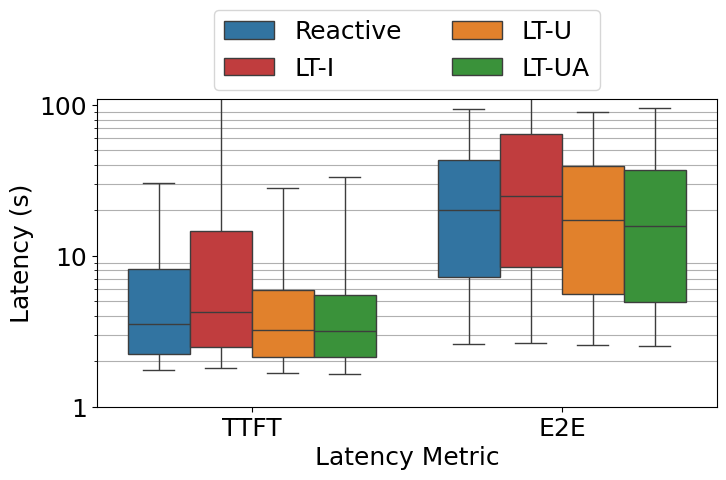

In [ ]:
f=18
model = 'A'
regions = ['westus', 'eastus', 'centralus']

monday = [('day-0', 'Reactive Only'),
    ('10_45_29', 'Immediate'),
          ('10_45_44', 'Utilization'),
          ('10_45_57', 'Utilization + ARIMA')
          ]

tuesday = [
    ('../results/sts_unified/', 'Reactive'),
    ('../results/lts_simple', 'LT-I'),
           ('../results/lts_memory_utilization', 'LT-U'),
           ('../results/lts_arima_checking', 'LT-UA')
           ]
custom_palette = {
    'Reactive': 'C0',
    'LT-U': 'C1',
    'LT-UA': 'C2',
    'LT-I': 'C3'
}
dfa = {
    'latency': [],
    'strategy':[],
    'metric': [],
}

for time, strategy in tuesday:
    path = os.path.join(time, 'global_router')
    # if not time.startswith('day'):
    #     path = os.path.join(get_output_dir_lts(date='2024_12_9', time=time), 'global_router')
    # else:
    #     path = os.path.join(get_output_dir(trace_filename=time), 'global_router')
    df = get_merged_df(path, sort_by=None)
    df = df[(df['workload_type'] == 'prod') & (df['model_type'] == 'A')]
    dfa['latency'].extend(list(df['ttft']))
    print(strategy, "ttft", (df['ttft']).quantile(0.9))
    print(strategy, "e2e", (df['response_time']).quantile(0.9))
    dfa['strategy'].extend([strategy]*len(df))
    dfa['metric'].extend(["TTFT"]*len(df))
    dfa['latency'].extend(list(df['response_time']))
    dfa['strategy'].extend([strategy]*len(df))
    dfa['metric'].extend(["E2E"]*len(df))

dfa = pd.DataFrame(dfa)

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8, 4))

sns.boxplot(data=dfa, x='metric', y='latency', hue='strategy', showfliers=False, whis=[5, 95], palette=custom_palette)
plt.legend(loc='upper center')
plt.ylim(1, 110)
plt.grid(axis='y')
plt.ylabel('Latency (s)', fontsize=f)
plt.yticks([1, 10, 100], [1, 10, 100], fontsize=f)
plt.xticks(fontsize=f)
plt.xlabel('Latency Metric', fontsize=f)
plt.legend(fontsize=f, loc='upper center', bbox_to_anchor=(0.5, 1.33), ncol=2)
plt.grid(which='both', axis='y')
ax = fig.gca()
ax.set_yscale('log')
ax.set_yticks([1, 10, 100])
ax.set_yticklabels([1, 10, 100], fontsize=f)
plt.savefig('../figures/eval-2.pdf', dpi=256, bbox_inches='tight')

plt.show()

In [ ]:
df = pd.read_csv('../traces/week.csv')


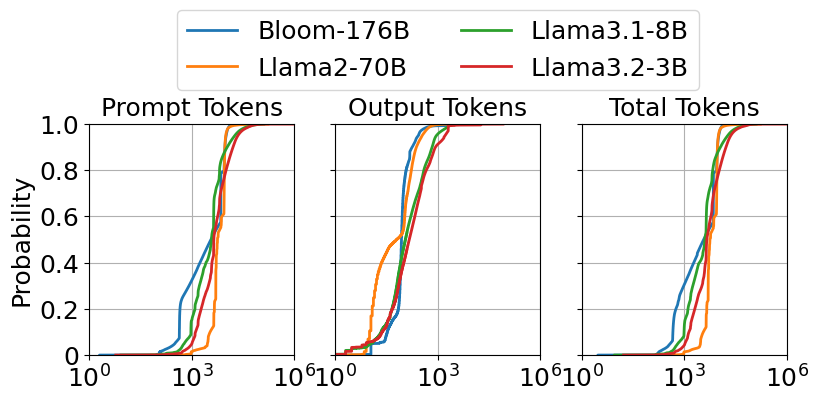

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

f=18
names = {
    'A': 'Llama2-70B',
    'B': 'Bloom-176B',
    'C': 'Llama3.1-8B',
    'D': 'Llama3.2-3B'
}

models = ['B', 'A', 'C', 'D']

keys = ['prompt_size', 'token_size', 'total_tokens']
k = {
    'prompt_size': 'Prompt Tokens',
    'token_size': 'Output Tokens',
    'total_tokens': 'Total Tokens'
}
df['total_tokens'] = df['prompt_size'] + df['token_size']
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

for i, model in enumerate(models):
    dfa = df[df['model_type'] == model]
    for j, key in enumerate(keys):
        data = list(dfa[key])
        sorted_data = np.sort(data)  # Sort the data
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)  # Compute the CDF
        
        # Plot the CDF
        axes[j].plot(sorted_data, cdf, label=f'{names[model]}', color=f'C{i}', linewidth=2)
        # mean, std = np.mean(data), np.std(data)

        axes[j].grid(True)
        axes[j].set_title(k[key], fontsize=f)
        axes[j].set_ylim(0, 1)
        axes[j].set_xscale('log')
        axes[j].set_xlim(1, 1e6)
        axes[j].xaxis.set_tick_params(labelsize=f)

        # axes[j].set_xticks([10e0, 10e2, 10e4, 10e6])
        # axes[j].set_xticklabels([10e0, 10e2, 10e4, 10e6], fontsize=f)
        # axes[j].set_xscale('symlog')
        axes[j].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        axes[j].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=f)
        axes[j].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        axes[j].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=f)
        # axes[j].set_xticklabels(fontsize=f)
axes[0].set_ylabel('Probability', fontsize=f)
# plt.xticks(fontsize=f)
plt.legend(fontsize=f, loc='upper center', bbox_to_anchor=(-0.7, 1.55), ncol=2)

# axes[0].legend(loc='upper left')
# plt.legend()
plt.savefig('../figures/fig5.pdf', dpi=256, bbox_inches='tight')

plt.show()




In [ ]:
df = pd.read_csv('../traces/day-1.csv')
tokens = {}
for i, row in df.iterrows():
    tokens[row['request_id']] = row['prompt_size'] + row['token_size']

df1 = get_merged_df(os.path.join(get_output_dir_lts(time='2_47_46'), 'global_router'), sort_by=None)#.join(df, on='request_id', how='inner', lsuffix='_left', rsuffix='_right')

df2 = get_merged_df(os.path.join(get_output_dir_lts(time='3_9_53'), 'global_router'), sort_by=None)#.join(df, on='request_id', how='inner', lsuffix='_left', rsuffix='_right')

df3 = get_merged_df(os.path.join(get_output_dir_lts(time='3_34_33'), 'global_router'), sort_by=None)#.join(df, on='request_id', how='inner', lsuffix='_left', rsuffix='_right')

df4 = get_merged_df(os.path.join(get_output_dir(trace_filename='day-1'), 'global_router'), sort_by=None)#.join(df, on='request_id', how='inner', lsuffix='_left', rsuffix='_right')

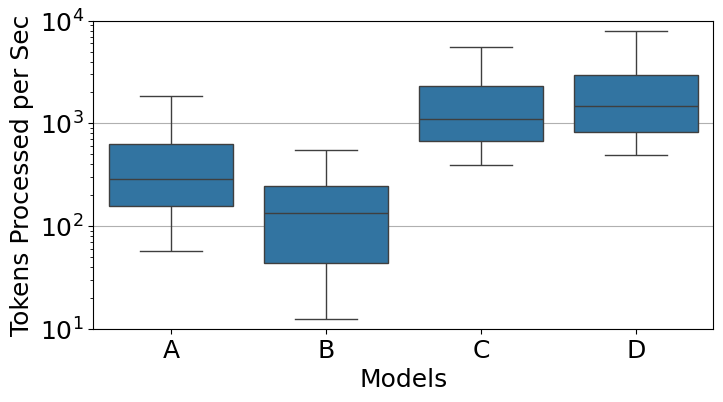

In [ ]:
dfa = {
    'model': [],
    'tps': [],
    'strategy': []
}
custom_palette = {
    'Reactive': 'C0',
    'LT-U': 'C1',
    'LT-UA': 'C2',
    'LT-I': 'C3'
}
def process(dfp):
    filtered = dfp[(dfp['completion_time'] < 86400)].copy()
    # filtered['completion_time'] = filtered['completion_time']
    # print(filtered.columns)
    filtered['tps'] = filtered.apply(lambda row: tokens[row['request_id']]/row['response_time'], axis=1)
    return filtered
    # grouped_df = filtered.groupby(['completion_time', 'model_type_right']).agg({'tokens': lambda x: sum(x) / 60}).reset_index()
    # return grouped_df
for dfl, strategy in [(df4, 'Reactive')]:
    dfx = process(dfl)
    dfa['model'].extend(list(dfx['model_type']))
    dfa['tps'].extend(list(dfx['tps']))
    dfa['strategy'].extend(len(dfx)*[strategy])

dfa = pd.DataFrame(dfa)

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8, 4))

sns.boxplot(data=dfa, x='model', y='tps', showfliers=False, whis=[5, 95], order=models)
# plt.legend(loc='upper center')
plt.ylim(10, 10000)
plt.grid(axis='y')
plt.ylabel('Tokens Processed per Sec', fontsize=f)
# plt.yticks([1, 10, 100], [1, 10, 100], fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
plt.xlabel('Models', fontsize=f)
# plt.legend(fontsize=f, loc='upper center', bbox_to_anchor=(0.5, 1.33), ncol=2)
ax = fig.gca()
ax.set_yscale('log')
# ax.set_yticks([1, 10, 100])
# ax.set_yticklabels([1, 10, 100], fontsize=f)
plt.savefig('../figures/fig3-1.png', dpi=256, bbox_inches='tight')

plt.show()

In [ ]:
dfa

,model,tps


In [ ]:
regions = ['westus', 'eastus', 'centralus']
models = ['A', 'B']
tuesday = [
    ('day-1', 'Reactive Only'),
    ('2_47_46', 'Immediate'),
    ('3_9_53', 'Utilization'),
    ('3_34_33', 'Utilization + ARIMA')
           ]
custom_palette = {
    'Reactive': 'C0',
    'LT-U': 'C1',
    'LT-UA': 'C2',
    'LT-I': 'C3'
}

df1 = get_merged_df(os.path.join("../results/full_week_results/lts_simple", 'memory'), sort_by='time')
df1['region_model'] = df1['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df1['region'] = df1.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df1['model'] = df1.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df2 = get_merged_df(os.path.join("../results/full_week_results/lts_memory_utilization", 'memory'), sort_by='time')
df2['region_model'] = df2['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df2['region'] = df2.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df2['model'] = df2.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df3 = get_merged_df(os.path.join("../results/full_week_results/lts_arima_checking", 'memory'), sort_by='time')
df3['region_model'] = df3['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df3['region'] = df3.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df3['model'] = df3.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

df4 = get_merged_df(os.path.join("../results/full_week_results/sts_unified", 'memory'), sort_by='time')
df4['region_model'] = df4['instance'].apply(lambda name: name[:name.index('_', name.index('_')+1)])
df4['region'] = df4.apply(lambda row: row['region_model'][:row['region_model'].index('_')], axis=1)
df4['model'] = df4.apply(lambda row: row['region_model'][row['region_model'].index('_')+1:], axis=1)

In [ ]:
dfs = [(df4, 'Reactive'), (df1, 'LT-I'), (df2, 'LT-U'), (df3, 'LT-UA')]
def get_incidents(x, type):
    change = x['scaling'] - x['instance']
    if change <= 0:
        return 0
    elif x['instance'] >= 10 and x['scaling'] > 10:
        return 0 if type=='intra' else change
    elif x['instance'] < 10 and x['scaling'] <= 10:
        return change  if type=='intra' else  0
    else:
        return (10 - x['instance'])  if type=='intra' else  (x['scaling'] - 10)

def process(df, m, r):
    filtered = df[(df['model'].str.startswith(m)) & (df['region'] == r) & (df['time'] < 86400)].copy()
    df_grouped = filtered.groupby('time').agg({'instance': lambda x: len(set(x))}).sort_values(by='time').reset_index()
    # df_grouped['time'] = df_grouped['time'] // 1
    # df_grouped = df_grouped.groupby('time').agg({'instance': 'max'}).sort_values(by='time').reset_index()
    df_grouped['scaling'] = df_grouped['instance'].shift(-1)
    df_grouped = df_grouped.iloc[:-1]

    df_grouped['scaling'] = df_grouped['scaling'].astype(int)
    inter = df_grouped.apply(lambda x: get_incidents(x, 'inter'), axis=1).sum()
    intra = df_grouped.apply(lambda x: get_incidents(x, 'intra'), axis=1).sum()
    return inter, intra

mp = {st:[] for _, st in dfs}

for df, strategy in dfs:
    for model in ['A', 'B']:
        inter, intra = 0, 0
        for region in regions:
            i1, i2 = process(df, model, region)
            inter+=i1
            intra+=i2
        mp[strategy].append(intra)
        mp[strategy].append(inter)



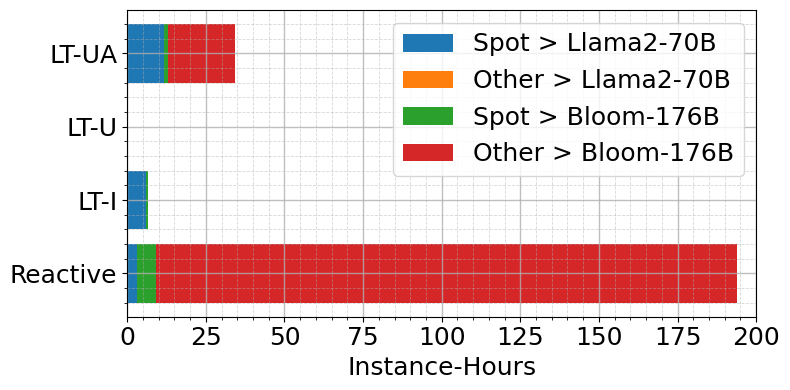

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
cat = [st for _, st in dfs]
group1 = [2.5 * mp[cat[i]][0] / 60 for i in range(4)]  # spot A
group2 = [10 * mp[cat[i]][1] / 60 for i in range(4)]  # inter A
group3 = [2.5 * mp[cat[i]][2] / 60 for i in range(4)]  # spot B
group4 = [10 * mp[cat[i]][3] / 60 for i in range(4)]  # inter B
plt.figure(figsize=(8,4))
# Bar positions
y_positions = np.arange(len(cat))

# Plot the horizontal stacked bars
plt.barh(y_positions, group1, label='Spot > Llama2-70B', color='C0')
plt.barh(y_positions, group2, left=group1, label='Other > Llama2-70B', color='C1')
plt.barh(y_positions, group3, left=np.add(group1, group2), label='Spot > Bloom-176B', color='C2')
plt.barh(y_positions, group4, left=np.add(np.add(group1, group2), group3), label='Other > Bloom-176B', color='C3')

# Add major gridlines
plt.grid(which='major', linestyle='-', linewidth=1.0, alpha=0.8)

# Add minor ticks and minor gridlines
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.6, alpha=0.5)

# Set x-axis limit
plt.xlim(0, 200)

# Add labels and title
plt.yticks(y_positions, cat, fontsize=f)
plt.xlabel('Instance-Hours', fontsize=f)
plt.xticks(fontsize=f)
plt.legend(fontsize=f)
plt.tight_layout()

# Save the figure
plt.savefig('../figures/fig6.pdf', dpi=256, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
df

In [ ]:
df = df1
filtered = df[(df['model'].str.startswith('A')) & (df['region'] == 'centralus') & (df['time'] < 86400)].copy()
df_grouped = filtered.groupby('time').agg({'instance': lambda x: len(set(x))}).sort_values(by='time').reset_index()
df_grouped['scaling'] = df_grouped['instance'].shift(-1)
df_grouped = df_grouped.iloc[:-1]
df_grouped['scaling'] = df_grouped['scaling'].astype(int)


In [ ]:
df_grouped[df_grouped['instance']<df_grouped['scaling']]

,time,instance,scaling
0,1.035194,8,9
65,66.019052,9,10
25203,25204.061143,4,5
25269,25270.016035,5,6
25340,25341.007749,6,7
25406,25407.045407,7,8
46800,46801.021156,4,5
46866,46867.001070,5,6
46931,46932.025966,6,7
46997,46998.002081,7,8


In [ ]:
d